# MEEP simulations

We will look again at a waveguide, but in the time-domain. This will introduce concepts important when doing time-domain simulations.

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

Using MPI version 3.1, 1 processes


Simple geometry as before :

In [2]:
resolution = 50 # pixels/μm
cell_size = mp.Vector3(14,14)

w = 0.5 # width of waveguide

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     material=mp.Medium(epsilon=12))]

An important difference from MPB is that we would like to avoid periodic boundary conditions. To do so, we can introduce [perfectly-matched layers](https://en.wikipedia.org/wiki/Perfectly_matched_layer) around the simulation region, see also https://meep.readthedocs.io/en/latest/Perfectly_Matched_Layer/.

!['PML'](images/PML.png)

In [3]:
pml_layers = [mp.PML(thickness=2)]

In the time-domain, we now need to define a way to excite the electromagnetic fields in the system. The most reliable way to do so is with en eigensource (see https://meep.readthedocs.io/en/latest/Python_Tutorials/Eigenmode_Source/). The EigenModeSource object has a location and direction, and during the initialization of the simulation will solve for the requested mode profile with MPB in order to only provide an input for this mode.

By sending a time-limited input, multiple frequency components can be represented in the same simulation. Here, we use a Gaussian source (Gaussian time pulse) :

In [4]:
fsrc = 0.15 # frequency of eigenmode or constant-amplitude source
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
bnum = 1    # band number of eigenmode

kpoint = mp.Vector3(kx)

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc),
                              center=mp.Vector3(),
                              size=mp.Vector3(y=3*w),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              #eig_parity=mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

Defining the simulation object is similar to ModeSolver :

In [5]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    symmetries=[mp.Mirror(mp.Y)])

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00280809 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.322351 s
-----------
MPB solved for omega_1(0.4,0,0) = 0.165058 after 17 iters
MPB solved for omega_1(0.355637,0,0) = 0.149677 after 7 iters
MPB solved for omega_1(0.356547,0,0) = 0.15 after 5 iters
MPB solved for omega_1(0.356547,0,0) = 0.15 after 2 iters


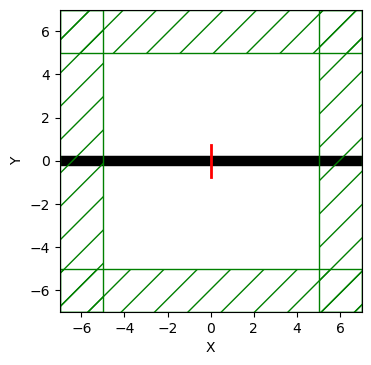

In [6]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

The `run` method will run the simulation until the prescribed condition is met. See https://meep.readthedocs.io/en/latest/Python_User_Interface/#run-and-step-functions.

In [8]:
sim.run(until=100) # Run for some time

on time step 5189 (time=51.89), 0.395668 s/step
Meep progress: 14.130000610351559/151.88999938964844 = 9.3% done in 4.0s, 39.0s to go
on time step 6603 (time=66.03), 0.00283052 s/step
Meep progress: 28.15000061035157/151.88999938964844 = 18.5% done in 8.0s, 35.2s to go
on time step 8005 (time=80.05), 0.00285594 s/step
Meep progress: 42.34000061035157/151.88999938964844 = 27.9% done in 12.0s, 31.1s to go
on time step 9425 (time=94.25), 0.00281769 s/step
Meep progress: 56.60000061035157/151.88999938964844 = 37.3% done in 16.0s, 27.0s to go
on time step 10851 (time=108.51), 0.00280629 s/step
Meep progress: 70.39000061035156/151.88999938964844 = 46.3% done in 20.0s, 23.2s to go
on time step 12230 (time=122.3), 0.00290218 s/step
Meep progress: 84.14000061035156/151.88999938964844 = 55.4% done in 24.0s, 19.3s to go
on time step 13606 (time=136.06), 0.00290873 s/step
Meep progress: 97.82000061035157/151.88999938964844 = 64.4% done in 28.0s, 15.5s to go
on time step 14974 (time=149.74), 0.0029

Simple built-in plotting tools, see https://meep.readthedocs.io/en/latest/Python_User_Interface/#data-visualization :

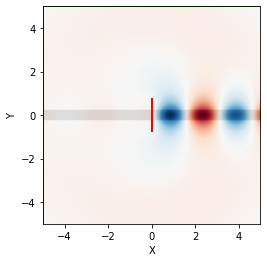

In [9]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10)),
           fields=mp.Ez,
           field_parameters={'alpha':0.9})
plt.show()

There are also options for video : https://meep.readthedocs.io/en/latest/Python_User_Interface/#Animate2D

In [ ]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate),until_after_sources=50)
plt.close()

on time step 10000 (time=100), 0.0271263 s/step
Meep progress: 8.570000000000007/383.3333435058594 = 2.2% done in 4.0s, 175.0s to go
on time step 11454 (time=114.54), 0.0027522 s/step
Meep progress: 21.120000000000005/383.3333435058594 = 5.5% done in 8.0s, 137.3s to go
on time step 12608 (time=126.08), 0.00346756 s/step
Meep progress: 32.59/383.3333435058594 = 8.5% done in 12.0s, 129.2s to go
on time step 13712 (time=137.12), 0.00362363 s/step
Meep progress: 41.49000000000001/383.3333435058594 = 10.8% done in 16.0s, 131.9s to go
on time step 14560 (time=145.6), 0.00471735 s/step
Meep progress: 50.0/383.3333435058594 = 13.0% done in 20.1s, 133.7s to go
on time step 15413 (time=154.13), 0.00469381 s/step
Meep progress: 58.66/383.3333435058594 = 15.3% done in 24.1s, 133.1s to go
on time step 16238 (time=162.38), 0.00485107 s/step
Meep progress: 66.0/383.3333435058594 = 17.2% done in 28.1s, 134.9s to go
on time step 16933 (time=169.33), 0.00575809 s/step
Meep progress: 73.0/383.33334350585

In [9]:
filename = 'media/oblique-source-normal.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...
